In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_sequence(n):
    # generates array of n numbers sampled iid from uniform distribution with range [0,1)
    return np.random.sample(size=n)

In [3]:
def ALG(sequence, threshold):
    for X_i in sequence:
        if X_i > threshold:
            return X_i
    return sequence[-1]

In [4]:
def Mohammad(sequence, k=1): # returns sum of highest k values of (X1,X2,...,Xn)
    sorted_seq = np.sort(sequence)  # this doesn't change order in 'sequence' itself
    return sum(sorted_seq[-k:])

Following generates 1000 sequences, each of length seq_length  
Then ALG is applied with thresholds lambda and eta  
The function returns averages of the ratios ALG/Xmax

In [5]:
def run_trials(seq_length, num_trials=1000):    
    rewards_lamda = []
    rewards_eta = []
    rewards_prophet = []
    lamda = 0.5*seq_length/(seq_length+1)
    eta = 0.5**(1/seq_length)
    for trial in range(num_trials):
        seq = generate_sequence(n=seq_length)
        rewards_lamda.append(ALG(seq, lamda))
        rewards_eta.append(ALG(seq, eta))
        rewards_prophet.append(Mohammad(seq))
    prophet_mean = np.mean(rewards_prophet)
    return np.mean(rewards_lamda)/prophet_mean, np.mean(rewards_eta)/prophet_mean

trials are done with different sequence lengths  

In [6]:
ratios_lamda = []
ratios_eta = []
seq_lengths = [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for n in seq_lengths:
    ratio_lamda, ratio_eta = run_trials(seq_length=n, num_trials=1000)
    ratios_lamda.append(ratio_lamda)
    ratios_eta.append(ratio_eta)

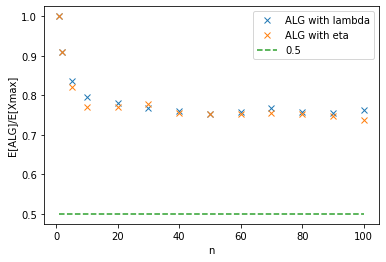

In [7]:
plt.plot(seq_lengths, ratios_lamda, 'x')
plt.plot(seq_lengths, ratios_eta, 'x')
plt.plot(seq_lengths, [0.5]*len(seq_lengths), '--')
plt.legend(['ALG with lambda', 'ALG with eta', '0.5'])
plt.xlabel('n')
plt.ylabel('E[ALG]/E[Xmax]')
plt.show()

In [8]:
def ALG_k2_naive(sequence, threshold_type='lambda'):
    n = len(sequence)
    n1, n2 = n//2, n-n//2
    seq1, seq2 = sequence[:n1], sequence[n1:]
    if threshold_type=='lambda':
        thr1, thr2 = 0.5*n1/(n1+1), 0.5*n2/(n2+1)
    elif threshold_type=='eta':
        thr1, thr2 = 0.5**(1/n1), 0.5**(1/n2)
    r1 = ALG(seq1, thr1)
    r2 = ALG(seq2, thr2)
    return r1+r2

In [9]:
def run_trials_k2(seq_length, num_trials=1000):    
    rewards_lamda = []
    rewards_eta = []
    rewards_prophet = []
    for trial in range(num_trials):
        seq = generate_sequence(n=seq_length)
        rewards_lamda.append(ALG_k2_naive(seq, 'lambda'))
        rewards_eta.append(ALG_k2_naive(seq, 'eta'))
        rewards_prophet.append(Mohammad(seq, k=2))
    prophet_mean = np.mean(rewards_prophet)
    return np.mean(rewards_lamda)/prophet_mean, np.mean(rewards_eta)/prophet_mean

In [10]:
ratios_lamda = []
ratios_eta = []
seq_lengths = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for n in seq_lengths:
    ratio_lamda, ratio_eta = run_trials_k2(seq_length=n, num_trials=1000)
    ratios_lamda.append(ratio_lamda)
    ratios_eta.append(ratio_eta)

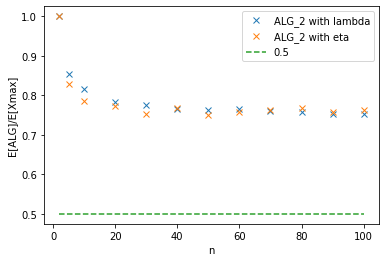

In [11]:
plt.plot(seq_lengths, ratios_lamda, 'x')
plt.plot(seq_lengths, ratios_eta, 'x')
plt.plot(seq_lengths, [0.5]*len(seq_lengths), '--')
plt.legend(['ALG_2 with lambda', 'ALG_2 with eta', '0.5'])
plt.xlabel('n')
plt.ylabel('E[ALG]/E[Xmax]')
plt.show()

In [12]:
def ALG_general_naive(sequence, k, threshold_type='lambda'):
    n = len(sequence)
    chunk_size = n//k
    rewards = []
    for i in range(k):
        if i==k-1:
            chunk = sequence[i*chunk_size:]
        else:
            chunk = sequence[i*chunk_size:(i+1)*chunk_size]
        n_i = len(chunk)
        if threshold_type=='lambda':
            thr = 0.5*n_i/(n_i+1)
        elif threshold_type=='eta':
            thr = 0.5**(1/n_i)
        reward = ALG(chunk, thr)
        rewards.append(reward)
    return sum(rewards)

In [13]:
def run_trials_general(seq_length, k, num_trials=1000):    
    rewards_lamda = []
    rewards_eta = []
    rewards_prophet = []
    for trial in range(num_trials):
        seq = generate_sequence(n=seq_length)
        rewards_lamda.append(ALG_general_naive(seq, k, 'lambda'))
        rewards_eta.append(ALG_general_naive(seq, k, 'eta'))
        rewards_prophet.append(Mohammad(seq, k))
    mean_prophet = np.mean(rewards_prophet)
    return np.mean(rewards_lamda)/mean_prophet, np.mean(rewards_eta)/mean_prophet

In [14]:
def run_ALG_k_exp(k):
    ratios_lamda = []
    ratios_eta = []
    seq_lengths = [20, 30, 40, 50, 60, 70, 80, 90, 100]
    for n in seq_lengths:
        ratio_lamda, ratio_eta = run_trials_general(n, k, 1000)
        ratios_lamda.append(ratio_lamda)
        ratios_eta.append(ratio_eta)
    plt.plot(seq_lengths, ratios_lamda, 'x')
    plt.plot(seq_lengths, ratios_eta, 'x')
    plt.plot(seq_lengths, [0.5]*len(seq_lengths), '--')
    plt.legend(['ALG_k with lambda', 'ALG_k with eta', '0.5'])
    plt.xlabel('n')
    plt.ylabel('E[ALG]/E[Xmax]')
    plt.title(f'k={k}')
    plt.show()

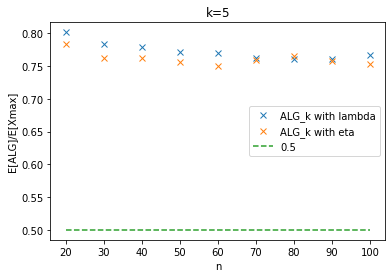

In [15]:
run_ALG_k_exp(k=5)

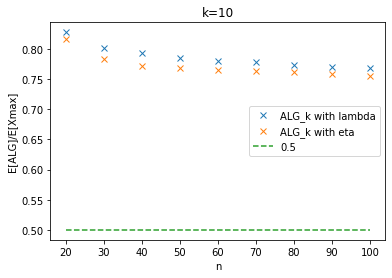

In [16]:
run_ALG_k_exp(k=10)

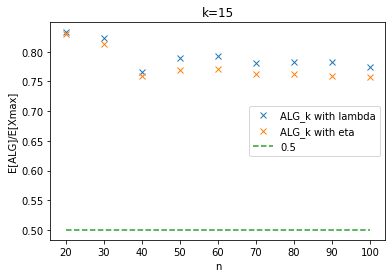

In [17]:
run_ALG_k_exp(k=15)

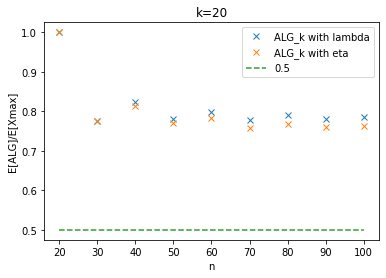

In [18]:
run_ALG_k_exp(k=20)